# Experiment 1: Noisy Sinusoids

In [3]:
import numpy as np
import tensorflow as tf
from scipy.stats import truncnorm

2023-04-23 21:08:19.693040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
from experiment2_noisy_sins import Noise_Env_clipped_X

env_extra_noise = Noise_Env_clipped_X()
meta_train_data = env_extra_noise.generate_meta_train_data(n_tasks=200, n_samples=5)
meta_test_data = env_extra_noise.generate_meta_test_data(n_tasks=20, n_samples_context=5, n_samples_test=200)

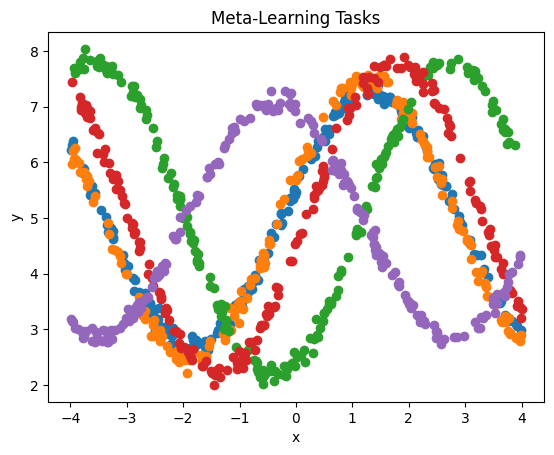

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
for x_context, y_context, x_test, y_test in meta_test_data[:5]:
    plt.scatter(x_test, y_test)
plt.title('Meta-Learning Tasks')
plt.xlabel('x')
plt.ylabel('y')


plt.show()

## BNN

2023-04-22 22:47:08.396187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:47:08.396807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
100%|█| 500/500 [00:08<00:00, 60.78it/s, loss=53.2, avg_ll=-36.5, avg_rmse=1.63,
2023-04-22 22:47:17.629902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a va

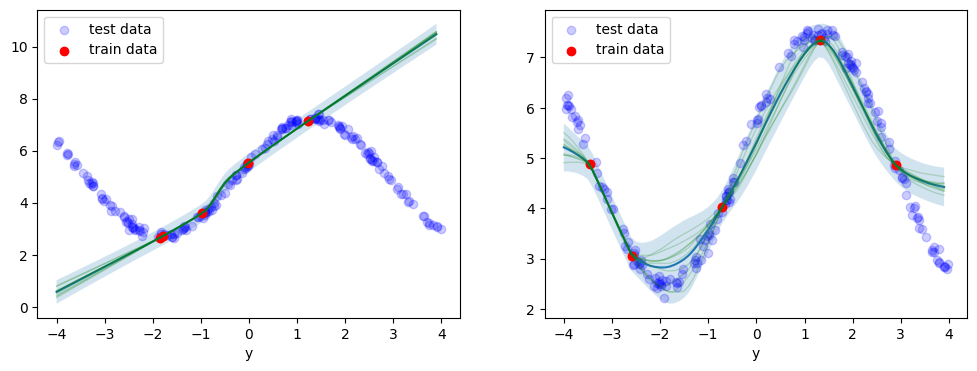

In [9]:
import warnings
import warnings
warnings.filterwarnings("ignore")

from pacoh_nn.bnn import BayesianNeuralNetworkSVGD

fig, axes = plt.subplots(1, 2, figsize=(12.0, 4.0))
for i in range(2):
    x_context, y_context, x_test, y_test = meta_test_data[i]
    
    # setting up and fitting the BNN
    bnn = BayesianNeuralNetworkSVGD(x_context, y_context, hidden_layer_sizes=(64, 64, 64, 64), prior_weight=0.001, bandwidth=1000.0)
    bnn.fit(x_val=x_test, y_val=y_test, num_iter_fit=500, log_period=500)
    
    # plotting
    x_plot = tf.range(-4, 4, 0.1)
    bnn.plot_predictions(x_plot, ax=axes[i])
    axes[i].scatter(x_test, y_test, color='blue', alpha=0.2, label="test data")
    axes[i].scatter(x_context, y_context, color='red', label="train data")
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_xlabel('y')

fig.show()

## PACOH-NN

2023-04-22 22:48:08.646362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:08.646919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:08.655052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:08.848493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:48:08.848913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:08.859410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:09.058397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:48:09.064353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:48:09.080574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:09.279100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.279519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:48:09.286211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:09.487440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.487871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.494393: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:09.691206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.692107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:48:09.704542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:09.898225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.898637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:09.906754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[

2023-04-22 22:48:10.106042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:10.106472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:48:10.113576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[

Start meta-training -------------------- 


2023-04-22 22:48:19.906333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]


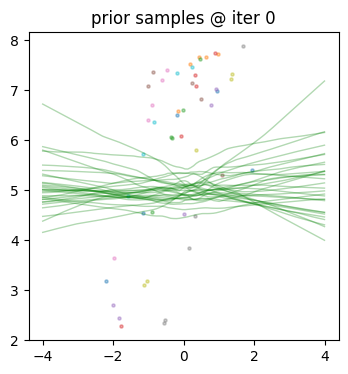


Iter 0/20000 - Time 26.32 sec - Train-Loss: -615.25488

Iter 1000/20000 - Time 14.90 sec - Train-Loss: -161.15556

Iter 2000/20000 - Time 14.88 sec - Train-Loss: -178.53516

Iter 3000/20000 - Time 14.72 sec - Train-Loss: -196.45952


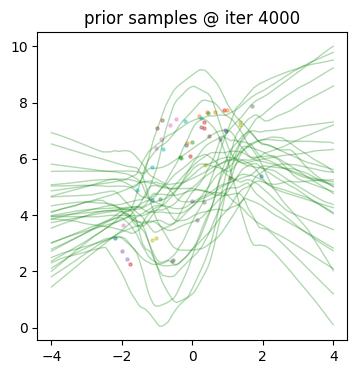


Iter 4000/20000 - Time 15.31 sec - Train-Loss: -92.53918

Iter 5000/20000 - Time 14.80 sec - Train-Loss: -53.96740

Iter 6000/20000 - Time 14.78 sec - Train-Loss: -175.00569

Iter 7000/20000 - Time 14.74 sec - Train-Loss: -166.90718


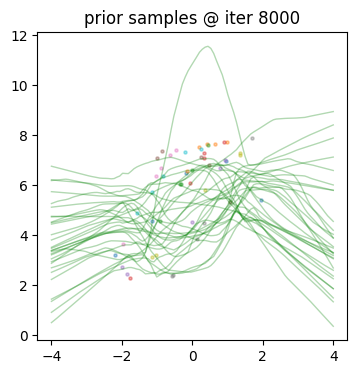


Iter 8000/20000 - Time 15.47 sec - Train-Loss: -120.20684

Iter 9000/20000 - Time 14.67 sec - Train-Loss: -128.26997


2023-04-22 22:51:10.533398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [5,1]
	 [[{{node Placeholder/_0}}]]
2023-04-22 22:51:10.533703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:51:10.540083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [200,1]
	 

	Start meta-test posterior inference in 2 batches ------------------
	Meta-Test batch #1 consisting of 5 tasks----
	Meta-Test batch #2 consisting of 5 tasks----

Iter 10000/20000 - Time 15.88 sec - Train-Loss: -140.14864- Val-avg_ll: -23.230 +- 20.488- Val-cal_err: 0.158 +- 0.042- Val-avg_rmse: 1.828 +- 0.488

Iter 11000/20000 - Time 20.79 sec - Train-Loss: -258.42056


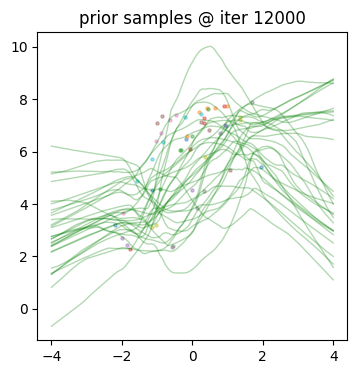


Iter 12000/20000 - Time 15.63 sec - Train-Loss: -72.12356

Iter 13000/20000 - Time 14.69 sec - Train-Loss: -110.80833

Iter 14000/20000 - Time 14.70 sec - Train-Loss: -117.78121

Iter 15000/20000 - Time 14.73 sec - Train-Loss: -150.10597


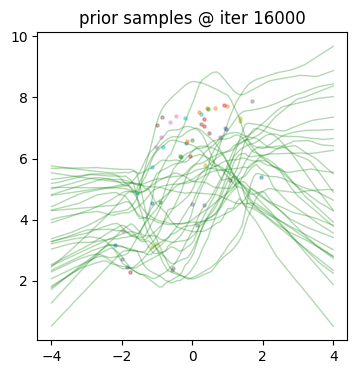


Iter 16000/20000 - Time 19.22 sec - Train-Loss: -172.18370

Iter 17000/20000 - Time 17.30 sec - Train-Loss: -184.61574

Iter 18000/20000 - Time 17.94 sec - Train-Loss: -97.76016

Iter 19000/20000 - Time 15.48 sec - Train-Loss: -119.74045


85.44784

In [10]:
from pacoh_nn.pacoh_nn_regression import PACOH_NN_Regression
pacoh_model = PACOH_NN_Regression(meta_train_data, random_seed=22, num_iter_meta_train=20000, num_iter_meta_test=3000,
                                  learn_likelihood=False, likelihood_std=0.1, hyper_prior_weight=1e-4)



pacoh_model.meta_fit(meta_test_data[:10], eval_period=10000, log_period=1000,
                     plot_prior_during_training=True, plot_period=4000)

2023-04-22 22:57:00.585438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:57:00.585729: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
100%|██████████████████████████| 3000/3000 [00:20<00:00, 148.92it/s, loss=-73.3]
2023-04-22 22:57:22.664948: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a va

2023-04-22 22:57:40.435098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [200,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:57:40.442769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 [[{{node Placeholder/_1}}]]
2023-04-22 22:57:40.443136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [5,1]
	 

	Start meta-test posterior inference in 4 batches ------------------
	Meta-Test batch #1 consisting of 5 tasks----
	Meta-Test batch #2 consisting of 5 tasks----
	Meta-Test batch #3 consisting of 5 tasks----
	Meta-Test batch #4 consisting of 5 tasks----
avg_ll: -18.7665 +- 13.7964
cal_err: 0.1953 +- 0.0910
avg_rmse: 1.7905 +- 0.4200


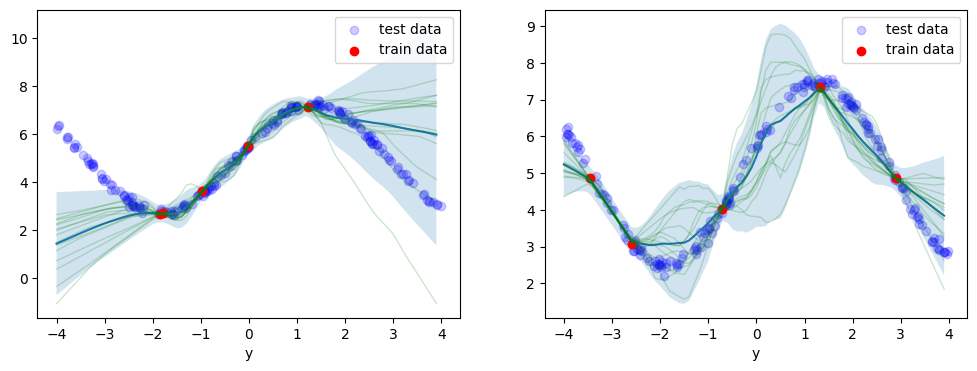

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12.0, 4.0))
for i in range(2):
    x_context, y_context, x_test, y_test = meta_test_data[i]
    
    # plotting
    x_plot = tf.range(-4, 4, 0.1)
    pacoh_model.plot_posterior(x_context, y_context, x_plot, ax=axes[i])
    axes[i].scatter(x_test, y_test, color='blue', alpha=0.2, label="test data")
    axes[i].scatter(x_context, y_context, color='red', label="train data")
    axes[i].legend()
    axes[i].set_xlabel('x')
    axes[i].set_xlabel('y')

fig.show()

eval_metrics_mean, eval_metrics_std = pacoh_model.meta_eval_datasets(meta_test_data)
for key in eval_metrics_mean:
    print("%s: %.4f +- %.4f"%(key, eval_metrics_mean[key], eval_metrics_std[key]))